   # t-Tests
  
   ***

#### Packages
***

In [1]:
import numpy as np
import pandas as pd
import statsmodels.stats.weightstats as stat
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

#### Fake data values
***

In [2]:
m_a, s_a, m_b, s_b = 1.0, 0.4, 2.0, 0.4
N = 40

a = np.random.normal(loc=m_a, scale=s_a, size=N)
b = np.random.normal(loc=m_b, scale=s_b, size=N)

df = pd.DataFrame({'Category': ['a'] * len(a) + ['b'] * len(b), 'Value': np.hstack([a,b])})

df

,Category,Value
0,a,0.912377
1,a,0.833538
2,a,0.060234
3,a,1.026498
4,a,1.274188
...,...,...
75,b,1.737831
76,b,2.539742
77,b,2.501401
78,b,1.988798


#### Plot data
***

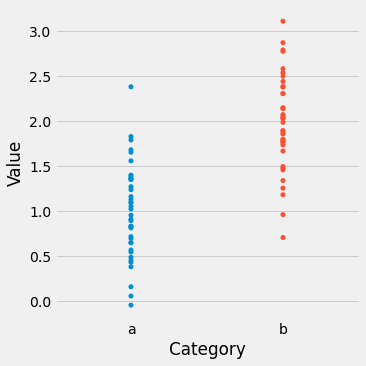

In [3]:
sns.catplot(x='Category', y='Value', jitter=False, data=df);

#### T-test
***

In [4]:
# The scipy.stats version.
t_ss, p_ss = ss.ttest_ind(a, b)
print(f"P_scipy: {p_ss:0.2f}")

P_scipy: 0.00


In [5]:
# test statistic, pvalue of the t-test, degrees of freedom used in the t-test
t, p, d = stat.ttest_ind(a, b)
print(f"P: {p:0.2f}")

P: 0.00


### Visualisation
***

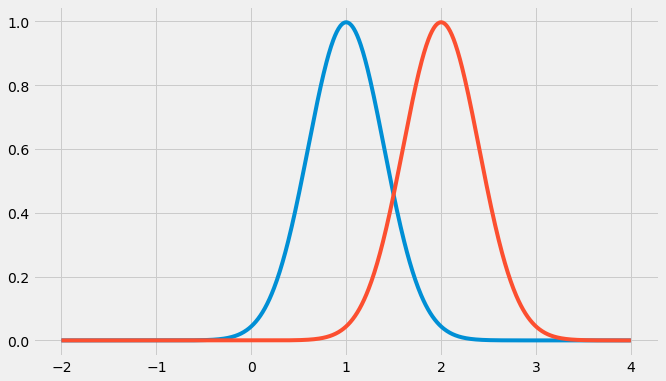

In [6]:

x = np.linspace(-2.0, 4.0, 1000)

y_a = ss.norm.pdf(x, m_a, s_a)
y_b = ss.norm.pdf(x, m_b, s_b)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y_a)
ax.plot(x, y_b)

plt.show()

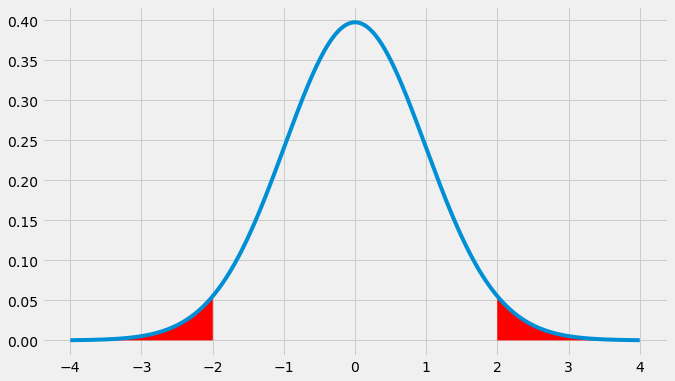

In [8]:

x_t = np.linspace(-4.0, 4.0, 1000)
t = ss.t.pdf(x_t, d)
tf = pd.DataFrame({'x': x_t, 't': t})

tcrit = abs(ss.t.ppf(0.025, d))
one = tf[tf['x'] >= tcrit]
two = tf[tf['x'] <= -tcrit]

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x_t, t)
ax.fill_between(one['x'], one['t'], 0, facecolor="red")
ax.fill_between(two['x'], two['t'], 0, facecolor="red")

plt.show()

## Type I errors - False Positives
***

In [17]:

trials = 10000
N = 1000
m_a, m_b, s = 2.0, 2.0, 0.3
rejects = 0

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] <= 0.05:
        rejects = rejects + 1

typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

5.51%


### Type II errors - False Negatives
***

In [18]:
trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.1, 0.3
dont = 0

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] > 0.05:
        dont = dont + 1

typeii = 100.0 * (dont / trials)
print(f"{typeii:0.2f}%")

34.93%


### Paired samples
***

References for this section:

[Vincent Arel-Bundock's R datasets list](https://vincentarelbundock.github.io/Rdatasets/articles/data.html)

[t-test: Comparing Group Means](https://uc-r.github.io/t_test)

In [20]:
dfsleep = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/sleep.csv")
dfsleep

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5
5,6,3.4,1,6
6,7,3.7,1,7
7,8,0.8,1,8
8,9,0.0,1,9
9,10,2.0,1,10


In [21]:
drugA = dfsleep[dfsleep["group"] == 1]
drugA = drugA.sort_values("ID")
drugA = drugA["extra"].to_numpy()
drugA

array([ 0.7, -1.6, -0.2, -1.2, -0.1,  3.4,  3.7,  0.8,  0. ,  2. ])

In [22]:
drugB = dfsleep[dfsleep["group"] == 2]
drugB = drugB.sort_values("ID")
drugB = drugB["extra"].to_numpy()
drugB

array([ 1.9,  0.8,  1.1,  0.1, -0.1,  4.4,  5.5,  1.6,  4.6,  3.4])

In [23]:
ss.ttest_rel(drugA, drugB)

Ttest_relResult(statistic=-4.062127683382037, pvalue=0.00283289019738427)

In [24]:
ss.ttest_1samp(drugB - drugA, 0)

Ttest_1sampResult(statistic=4.062127683382037, pvalue=0.00283289019738427)

In [25]:
stat.DescrStatsW(drugB - drugA).ttest_mean(0)

(4.062127683382037, 0.00283289019738427, 9.0)